# 형태학적 변환 팽창 과 침식

python에서 확장, 침식 실험 예시

1. 그러면 어떻게 이미지를 확장하거나 확대할 수 있을까?
    - 커널을 사용하여 입력 이미지에 컨볼루션을 수행하기만 하면 됩니다. 커널은 어떤 모양이든 될 수 있지
만 일반적으로 정사각형입니다. 입력 이미지(왼쪽 이미지)와 커널(가운데 이미지)이 있습니다. 

    - 다음 단계는 팽창을 수행하는 것입니
다. 커널 의 각 위치에 대한 로컬 최대값 을 계산하기 위해 커널을 가져와 전체 이미지에서 실행할 것 입
니다. 이 로컬 최대값은 출력 이미지에 저장할 것입니다. 

    - 따라서 확장 과정은 이미지와 커널 사이의 현
재 겹침의 로컬 최대값을 찾는 것으로 볼 수 있습니다. 이미지와의 겹침은 커널에 흰색 픽셀이 있는 픽
셀 집합으로 정의됩니다. 우리가 무시하는 커널의 검은색 픽셀과 이미지 픽셀의 겹침.


2. 침식이란 무엇인가 ?
    - 확장 외에도 침식이라고 하는 보완 작업도 있습니다. 이 작업은 확장의 완전한 반전입니다.
    
    - 커널은 이미지를 스캔하고 커널과 이미지 픽셀 사이의 겹치는 간격을 찾습니다.
    
    - 그러나 확장과는 달리 여기서는 로컬 최소값 을 계산합니다 .
    
    - 즉, 커널의 1이 이미지의 1과만 겹치는 경우에만 결과가 1(흰색 픽셀)이 됩니다.
    
    - 반면에 다른 모든 경우에는 로컬 최소값이 0(검은색 픽셀)이 됩니다.

- OpenCV에서 이것을 어떻게 구현할 수 있는지 봅시다. 두 단계가 있습니다. 우선 이미지를 가져와야
합니다. 그런 다음 커널을 정의해야 합니다.

- 첫 번째 단계로 입력 이미지를 로드하고 이진 이미지를 만들기 위해 임계값을 지정해야 합니다.

- 흰색에 가까운 색상은 검은색으로 변하고 회색과 검은색 부
분은 흰색으로 변하는 것을 확인할 수 있습니다.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# image loading and input image -> gray
img = cv2.imread("./Billiards.png", cv2.IMREAD_GRAYSCALE)

In [8]:
# 임계값 연산자의 출력을 마스크 라는 변수에 저장
# 230 보다 작으면 모든 값은 흰색 처리 / 230 보다 큰 모든 값은 검은색 이 됩니다.
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

In [9]:
titles = ['image', 'mask']
images = [img, mask]

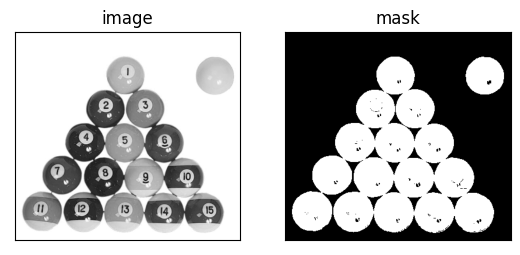

In [10]:
for i in range(2):
    plt.subplot(1, 2, i+1),
    plt.imshow(images[i], 'gray'),
    plt.title(titles[i]),
    plt.xticks([]),
    plt.yticks([]),
plt.savefig('08.Mask.png')    
plt.show()